In [2]:
import pandas as pd
import numpy as np

C:\Users\raafat\AppData\Local\Temp\ipykernel_11752\2162656668.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [5]:
# open the files
demog = pd.read_sas('DEMO_L.xpt', format='xport', encoding='utf-8')
chol = pd.read_sas('TCHOL_L.xpt', format='xport', encoding='utf-8')
demog.head()

,SEQN,SDDSRVYR,RIDSTATR,RIAGENDR,RIDAGEYR,RIDAGEMN,RIDRETH1,RIDRETH3,RIDEXMON,RIDEXAGM,...,DMDHRGND,DMDHRAGZ,DMDHREDZ,DMDHRMAZ,DMDHSEDZ,WTINT2YR,WTMEC2YR,SDMVSTRA,SDMVPSU,INDFMPIR
0,130378.0,12.0,2.0,1.0,43.0,NaN,5.0,6.0,2.0,NaN,...,NaN,NaN,NaN,NaN,NaN,50055.450807,54374.463898,173.0,2.0,5.00
1,130379.0,12.0,2.0,1.0,66.0,NaN,3.0,3.0,2.0,NaN,...,NaN,NaN,NaN,NaN,NaN,29087.450605,34084.721548,173.0,2.0,5.00
2,130380.0,12.0,2.0,2.0,44.0,NaN,2.0,2.0,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,80062.674301,81196.277992,174.0,1.0,1.41
3,130381.0,12.0,2.0,2.0,5.0,NaN,5.0,7.0,1.0,71.0,...,2.0,2.0,2.0,3.0,NaN,38807.268902,55698.607106,182.0,2.0,1.53
4,130382.0,12.0,2.0,1.0,2.0,NaN,3.0,3.0,2.0,34.0,...,2.0,2.0,3.0,1.0,2.0,30607.519774,36434.146346,182.0,2.0,3.60


In [7]:
# merge the dataframes on 'SEQN'
merged_df = pd.merge(demog, chol, on='SEQN', how='left')
merged_df.shape

(11933, 30)

In [9]:
cols = ['SEQN', 'RIAGENDR', 'RIDAGEYR', 'LBXTC']
final_df = merged_df[cols]
final_df.head()

,SEQN,RIAGENDR,RIDAGEYR,LBXTC
0,130378.0,1.0,43.0,264.0
1,130379.0,1.0,66.0,214.0
2,130380.0,2.0,44.0,187.0
3,130381.0,2.0,5.0,NaN
4,130382.0,1.0,2.0,NaN


In [10]:
# change the column names
final_df.columns = ['Participant_ID',
                    'Gender',
                    'Age',
                    'Total_Cholesterol']
final_df.head()

,Participant_ID,Gender,Age,Total_Cholesterol
0,130378.0,1.0,43.0,264.0
1,130379.0,1.0,66.0,214.0
2,130380.0,2.0,44.0,187.0
3,130381.0,2.0,5.0,NaN
4,130382.0,1.0,2.0,NaN


In [12]:
# create the test_df having only men (Gender = 1)
test_df = final_df[final_df['Gender'] == 1]

# taking ages from 40 to 60 included
test_df = test_df[(test_df['Age'] >= 40) & (test_df['Age'] <= 60)]

# remove rows with missing Total_Cholesterol values
test_df = test_df.dropna(subset=['Total_Cholesterol'])

test_df.shape

(777, 4)

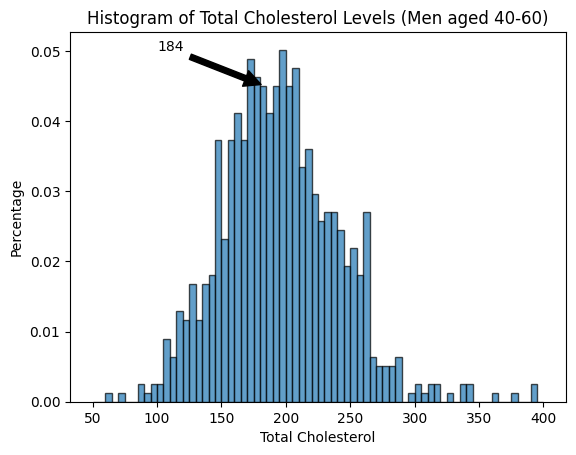

In [ ]:
# plot a histogram with a step of 5 for Total_Cholesterol (50 to 400) vs Percentage in %
# add a pointer (arrow) to indicate the 184 value of Total_Cholesterol
import matplotlib.pyplot as plt

bins = np.arange(50, 405, 5)
plt.hist(test_df['Total_Cholesterol'], bins=bins, weights=np.ones(len(test_df)) / len(test_df), edgecolor='black', alpha=0.7)
plt.xlabel('Total Cholesterol')
plt.ylabel('Percentage')
plt.title('Histogram of Total Cholesterol Levels (Men aged 40-60)')
plt.annotate('184', xy=(184, 0.045), xytext=(100, 0.05),
             arrowprops=dict(facecolor='black', shrink=0.05))
plt.show()

In [27]:
# create the plotting df having the cholesterol levels with the percentage of people
# having that cholesterol level
plotting_df = test_df['Total_Cholesterol'].value_counts(normalize=True).reset_index()
# change the column names
plotting_df.columns = ['cholesterol_level', 'population_perc']

plotting_df['population_perc'] = plotting_df['population_perc'] * 100
# sort the dataframe by cholesterol level

plotting_df.sort_values(by='cholesterol_level', inplace=True)
plotting_df.head()

,cholesterol_level,population_perc
183,62.0,0.1287
172,74.0,0.1287
174,88.0,0.1287
175,89.0,0.1287
161,90.0,0.1287


In [30]:
# merge the cholesterol levels into bins of 5
plotting_df['cholesterol_level'] = (plotting_df['cholesterol_level'] // 5) * 5
plotting_df = plotting_df.groupby('cholesterol_level', as_index=False).sum()    
plotting_df.head()

,cholesterol_level,population_perc
0,60.0,0.1287
1,70.0,0.1287
2,85.0,0.2574
3,90.0,0.1287
4,95.0,0.2574


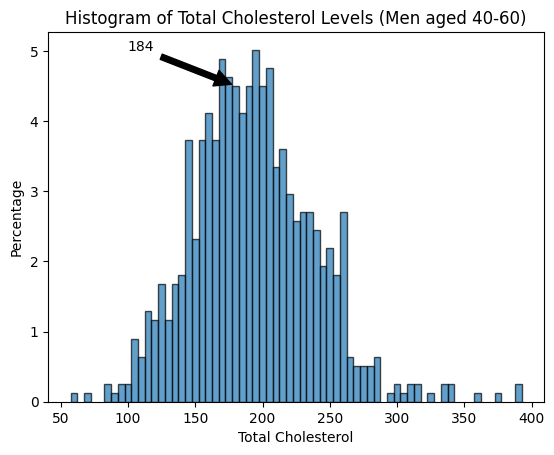

In [34]:
# plot a histogram plot for the plotting_df by bins of 5
# poitn on 184 cholesterol level
plt.bar(plotting_df['cholesterol_level'], plotting_df['population_perc'], width=5, edgecolor='black', alpha=0.7)
plt.xlabel('Total Cholesterol')
plt.ylabel('Percentage')
plt.title('Histogram of Total Cholesterol Levels (Men aged 40-60)')
plt.annotate('184', xy=(180, plotting_df[plotting_df['cholesterol_level'] == 180]['population_perc'].values[0]),
             xytext=(100, 5),
             arrowprops=dict(facecolor='black', shrink=0.05))
plt.savefig('cholesterol_histogram.png')
plt.show()


In [33]:
# save the plotting_df to a csv file
plotting_df.to_csv('cholesterol_histogram_data.csv', index=False)

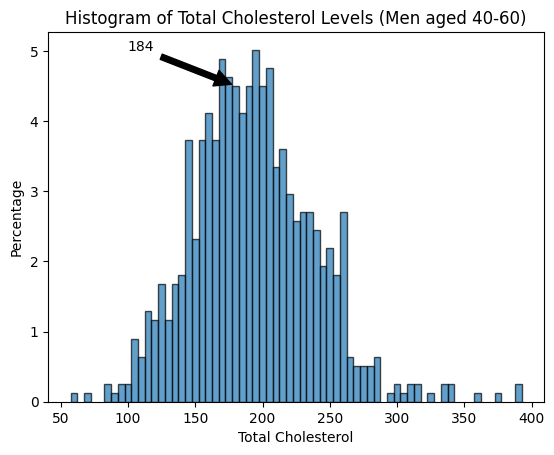

In [35]:
# load and plot
loaded_df = pd.read_csv('cholesterol_histogram_data.csv')
plt.bar(loaded_df['cholesterol_level'], loaded_df['population_perc'], width=5, edgecolor='black', alpha=0.7)
plt.xlabel('Total Cholesterol')
plt.ylabel('Percentage')
plt.title('Histogram of Total Cholesterol Levels (Men aged 40-60)')
plt.annotate('184', xy=(180, loaded_df[loaded_df['cholesterol_level'] == 180]['population_perc'].values[0]),
             xytext=(100, 5),
             arrowprops=dict(facecolor='black', shrink=0.05))
plt.savefig('cholesterol_histogram.png')
plt.show()